In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


In [4]:
df=pd.read_csv('/content/drive/MyDrive/Model/Customer-Churn-Records.csv')

FileNotFoundError: ignored

In [ ]:
df.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [ ]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


**Data Analysis**

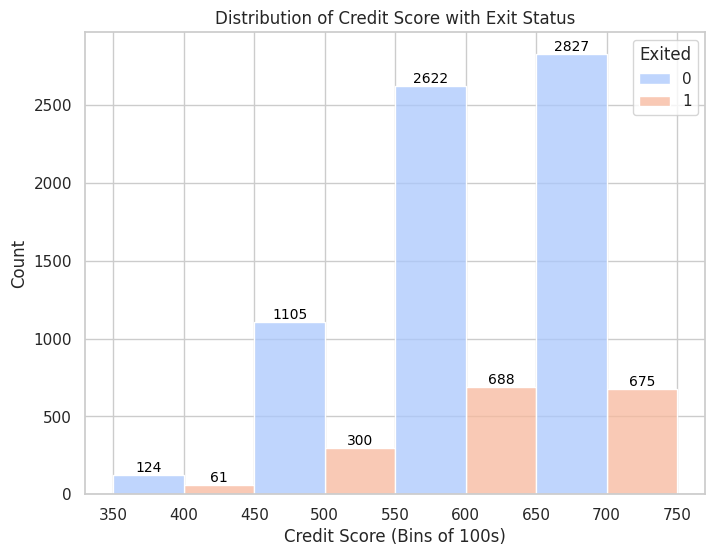

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Create a histogram plot with hue
ax = sns.histplot(data=df, x='CreditScore', bins=range(np.min(df.CreditScore), np.max(df.CreditScore), 100), hue='Exited', multiple="dodge", palette='coolwarm')

# Set labels and title
plt.xlabel('Credit Score (Bins of 100s)')
plt.ylabel('Count')
plt.title('Distribution of Credit Score with Exit Status')

# Annotate bars with counts
for p in ax.patches:
    if not np.isnan(p.get_height()):
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()


**Conclustion: From the above graph we can say that Higher the CreditScore lower are the  chances that the customer will exit the Bank**

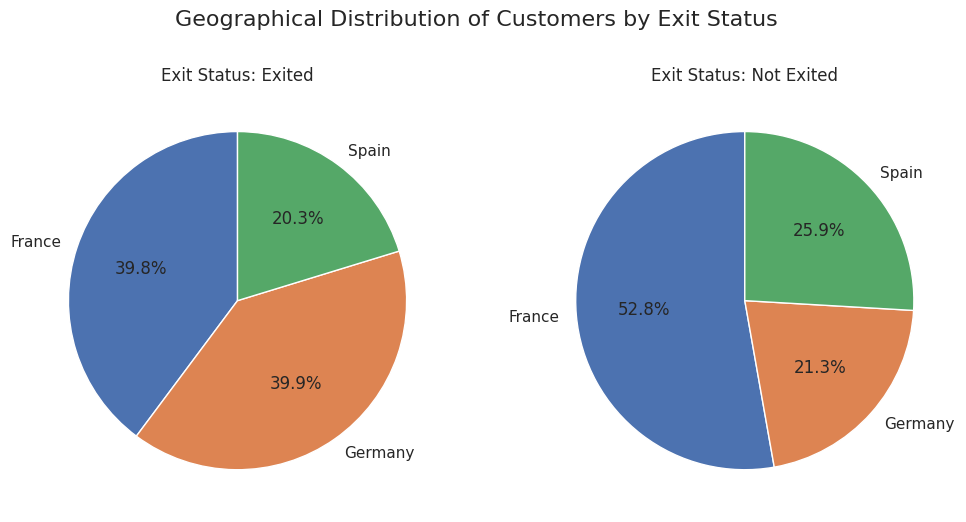

In [ ]:
import matplotlib.pyplot as plt

# Group the data by 'Geography' and 'Exited' columns and count the occurrences
geography_exit_counts = df.groupby(['Geography', 'Exited']).size().unstack()

# Create a single figure with two pie charts side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Create a pie chart for Exited customers
ax1.pie(geography_exit_counts[1], labels=geography_exit_counts.index, autopct='%1.1f%%', startangle=90)
ax1.set_title("Exit Status: Exited")

# Create a pie chart for Not Exited customers
ax2.pie(geography_exit_counts[0], labels=geography_exit_counts.index, autopct='%1.1f%%', startangle=90)
ax2.set_title("Exit Status: Not Exited")

# Set an overall title for the subplots
fig.suptitle("Geographical Distribution of Customers by Exit Status", fontsize=16)

# Display the pie charts
plt.show()


**Conclusion: From the piechart we can see that the number of customers living in Spain have almost equal chances that of being Excited to leave and Not Excited to leave but this is not true in case of France and Germany**

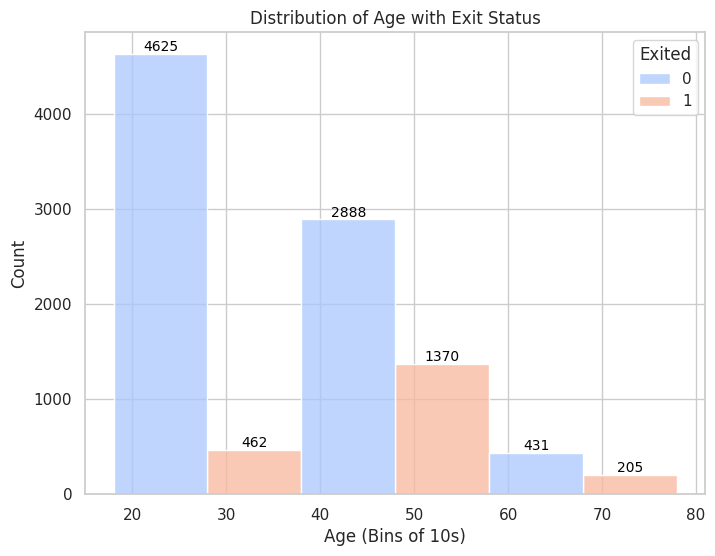

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Create a histogram plot with hue
ax = sns.histplot(data=df, x='Age', bins=range(np.min(df.Age), np.max(df.Age), 20), hue='Exited', multiple="dodge", palette='coolwarm')

# Set labels and title
plt.xlabel('Age (Bins of 10s)')
plt.ylabel('Count')
plt.title('Distribution of Age with Exit Status')

# Annotate bars with counts
for p in ax.patches:
    if not np.isnan(p.get_height()):
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()


**Conclusion: From the bar graph we can say that as the age increses the chace of taking exit from bank increases**

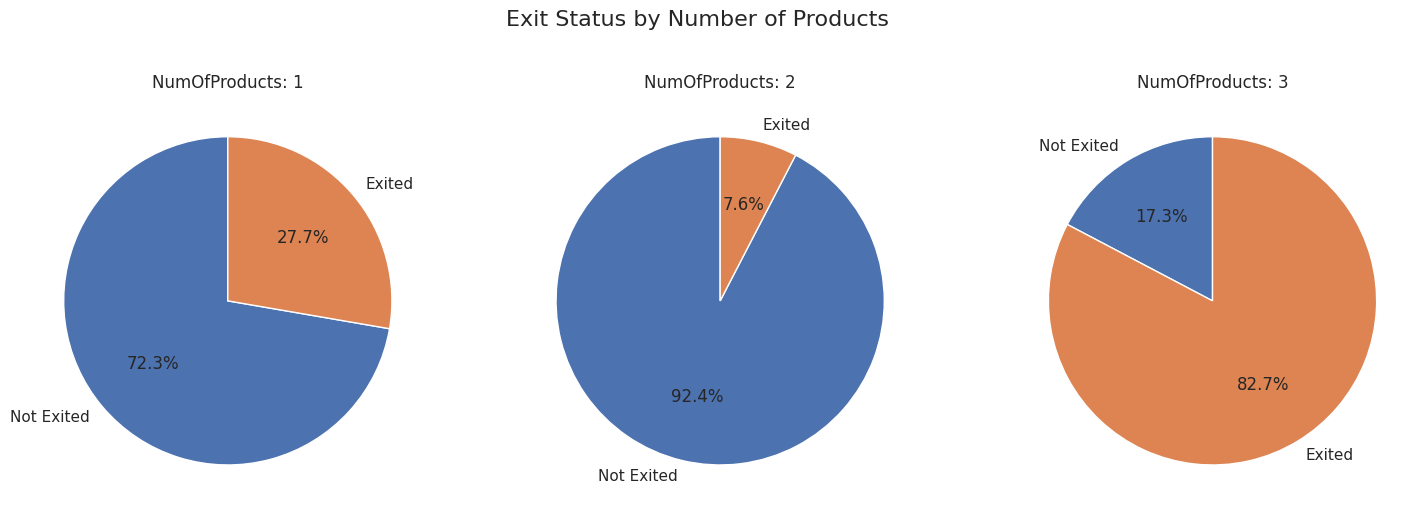

In [ ]:
import matplotlib.pyplot as plt

# Group the data by 'NumOfProducts' and 'Exited' columns and count the occurrences
product_exit_counts = df.groupby(['NumOfProducts', 'Exited']).size().unstack()

# Create a single figure with pie charts for each value of 'NumOfProducts'
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, num_of_products in enumerate([1, 2, 3]):
    ax = axes[i]

    # Create a pie chart for Exited customers
    ax.pie(product_exit_counts.loc[num_of_products, :], labels=['Not Exited', 'Exited'], autopct='%1.1f%%', startangle=90)
    ax.set_title(f"NumOfProducts: {num_of_products}")

# Set an overall title for the subplots
fig.suptitle("Exit Status by Number of Products", fontsize=16)

# Display the pie charts
plt.show()


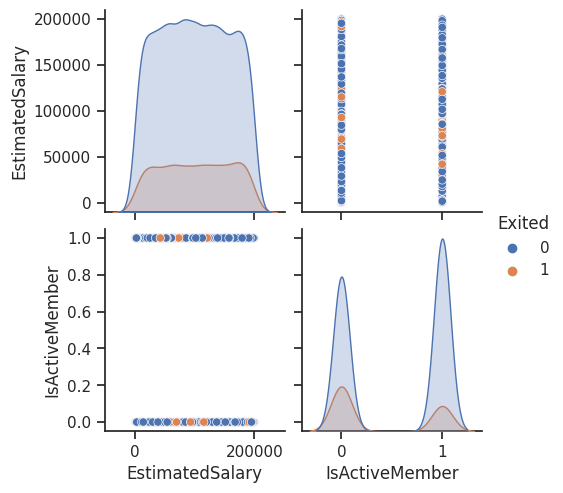

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample code to create the pair plot
sns.set(style="ticks")
sns.pairplot(df, hue="Exited", vars=["EstimatedSalary", "IsActiveMember"])
plt.show()


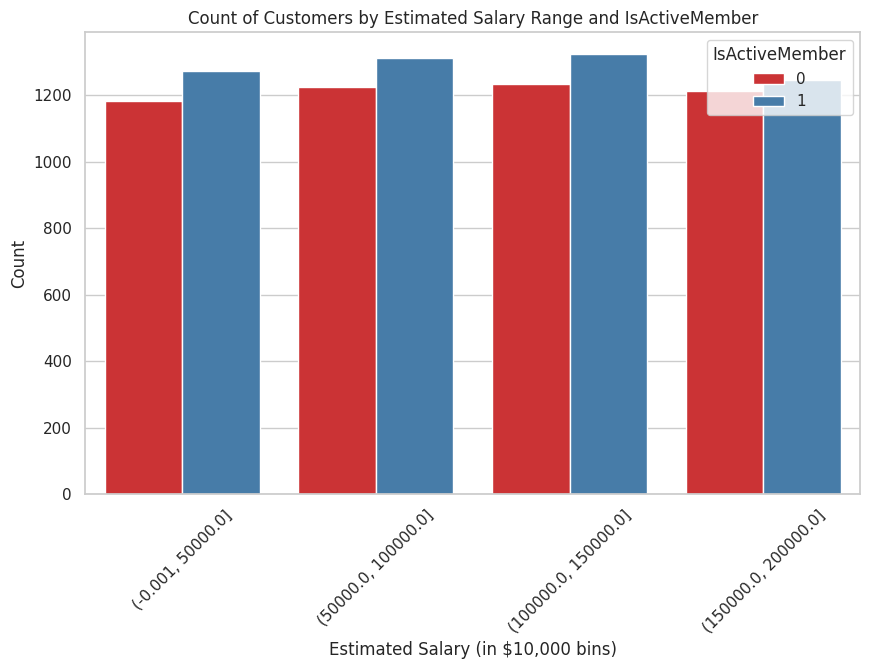

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create salary bins in ranges of 10,000
salary_bins = pd.cut(df['EstimatedSalary'], bins=range(0, int(df['EstimatedSalary'].max()) + 50000, 50000), include_lowest=True)

# Create a count plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# You can adjust the x and hue parameters to customize your visualization
sns.countplot(data=df, x=salary_bins, hue='IsActiveMember', hue_order=[0, 1], palette="Set1")

# Set labels and title
plt.xlabel('Estimated Salary (in $10,000 bins)')
plt.ylabel('Count')
plt.title('Count of Customers by Estimated Salary Range and IsActiveMember')

# Show the plot
plt.xticks(rotation=45)
plt.show()


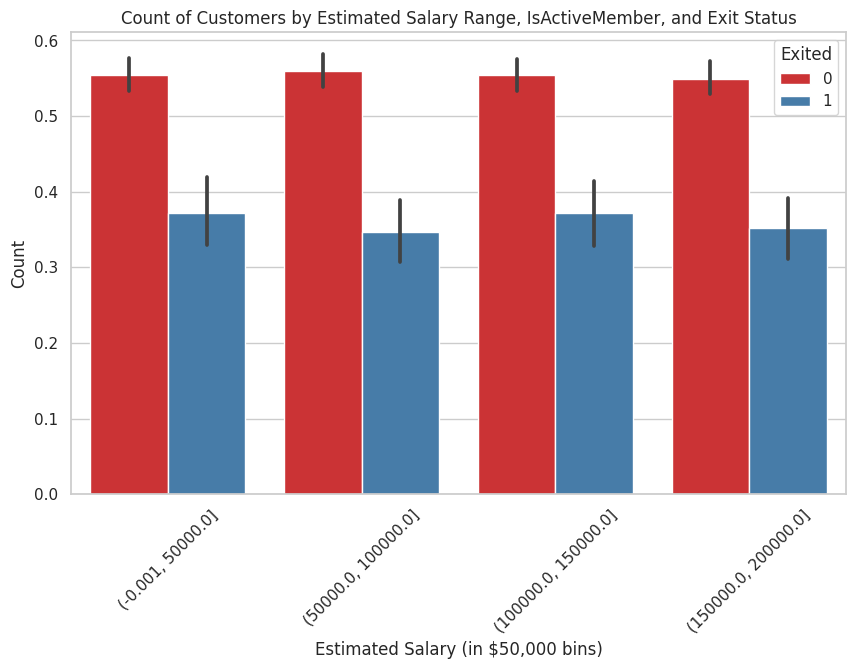

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create salary bins in ranges of 50,000
salary_bins = pd.cut(df['EstimatedSalary'], bins=range(0, int(df['EstimatedSalary'].max()) + 50000, 50000), include_lowest=True)

# Create a bar plot with hue
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# You can adjust the x and hue parameters to customize your visualization
sns.barplot(data=df, x=salary_bins, y='IsActiveMember', hue='Exited', palette="Set1")

# Set labels and title
plt.xlabel('Estimated Salary (in $50,000 bins)')
plt.ylabel('Count')
plt.title('Count of Customers by Estimated Salary Range, IsActiveMember, and Exit Status')

# Show the plot
plt.xticks(rotation=45)
plt.show()


<ipython-input-14-183232338b38>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr().round(2)  # Round to 2 decimals


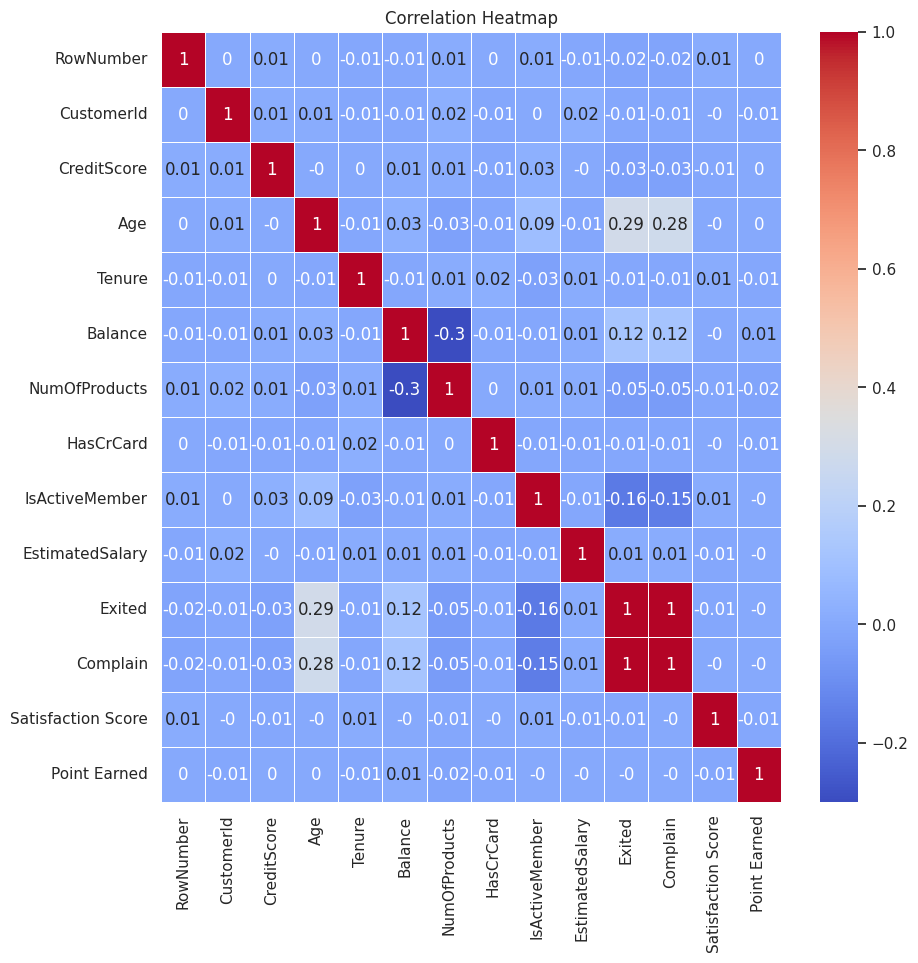

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df.corr().round(2)  # Round to 2 decimals

# Create a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
df.isna().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [ ]:
df.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

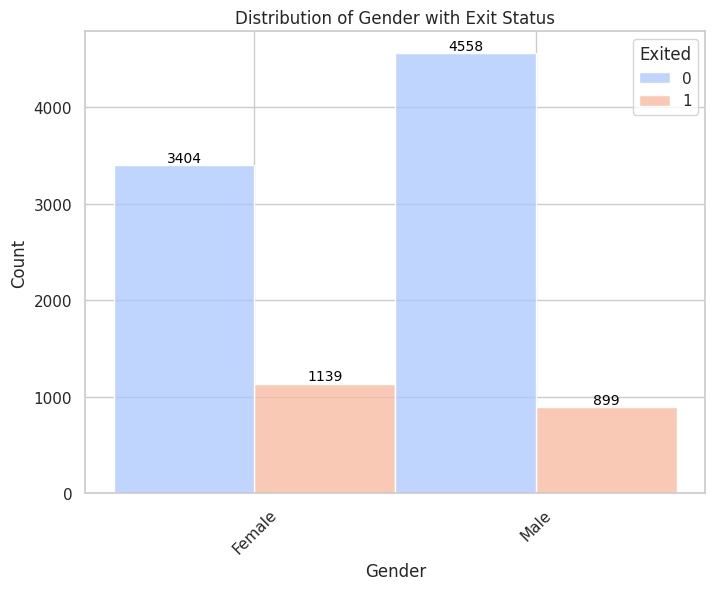

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Create a histogram plot with hue for card types
ax = sns.histplot(data=df, x='Gender', hue='Exited', multiple="dodge", palette='coolwarm')

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender with Exit Status')

# Annotate bars with counts
for p in ax.patches:
    if not p.get_height() == 0:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.xticks(rotation=45)
plt.show()


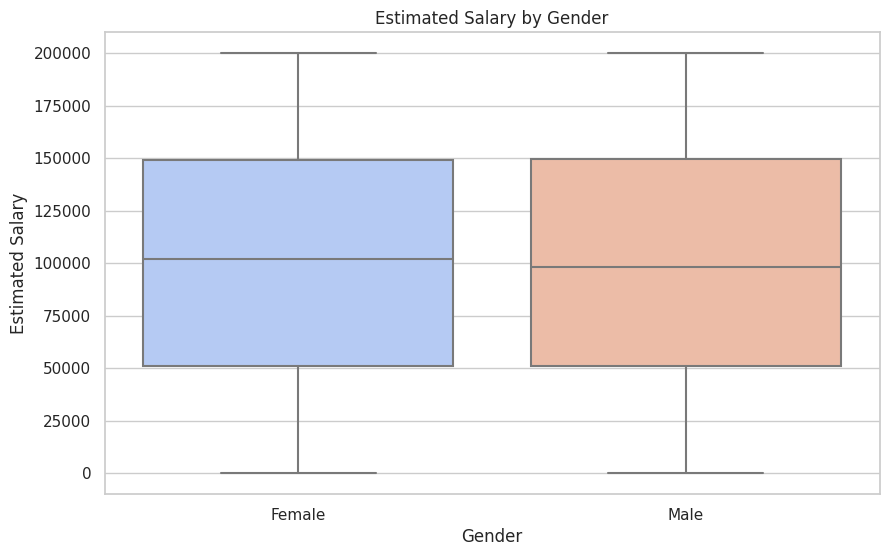

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Create a box plot
sns.boxplot(data=df, x='Gender', y='EstimatedSalary', palette='coolwarm')

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Estimated Salary')
plt.title('Estimated Salary by Gender')

# Show the plot
plt.show()


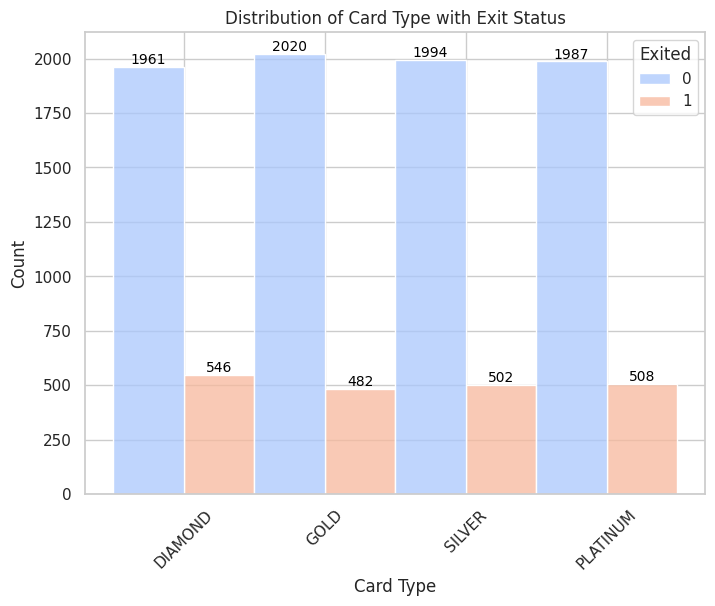

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Create a histogram plot with hue for card types
ax = sns.histplot(data=df, x='Card Type', hue='Exited', multiple="dodge", palette='coolwarm')

# Set labels and title
plt.xlabel('Card Type')
plt.ylabel('Count')
plt.title('Distribution of Card Type with Exit Status')

# Annotate bars with counts
for p in ax.patches:
    if not p.get_height() == 0:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.xticks(rotation=45)
plt.show()


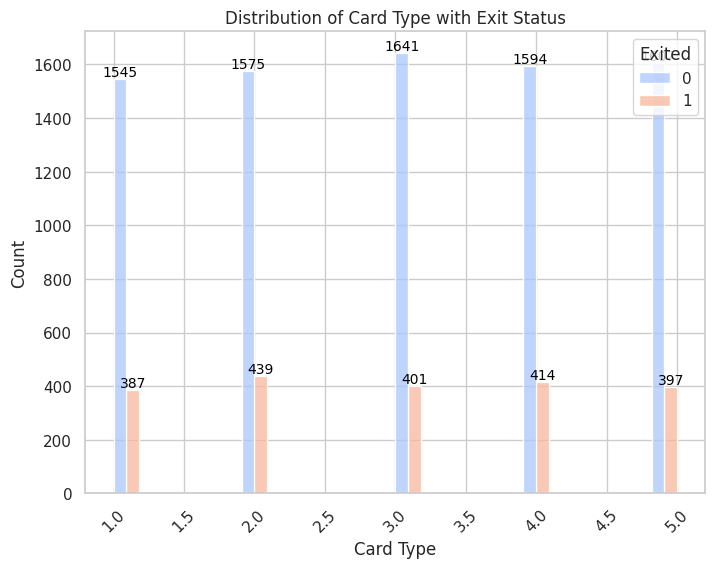

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Create a histogram plot with hue for card types
ax = sns.histplot(data=df, x='Satisfaction Score', hue='Exited', multiple="dodge", palette='coolwarm')

# Set labels and title
plt.xlabel('Card Type')
plt.ylabel('Count')
plt.title('Distribution of Card Type with Exit Status')

# Annotate bars with counts
for p in ax.patches:
    if not p.get_height() == 0:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.xticks(rotation=45)
plt.show()


<ipython-input-21-0abccbad1bc0>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Card Type', y='EstimatedSalary', palette='coolwarm', ci=None)


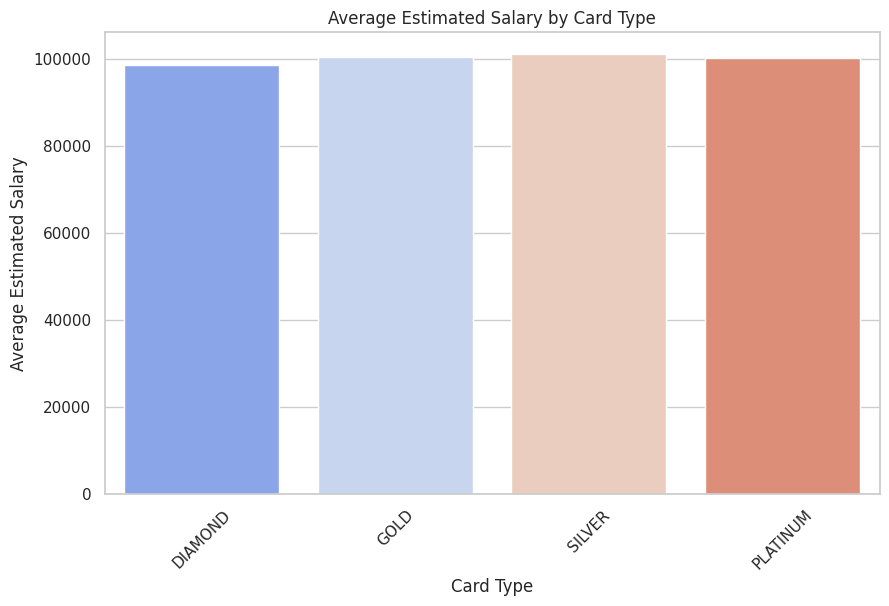

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Create a bar plot
sns.barplot(data=df, x='Card Type', y='EstimatedSalary', palette='coolwarm', ci=None)

# Set labels and title
plt.xlabel('Card Type')
plt.ylabel('Average Estimated Salary')
plt.title('Average Estimated Salary by Card Type')

# Show the plot
plt.xticks(rotation=45)
plt.show()


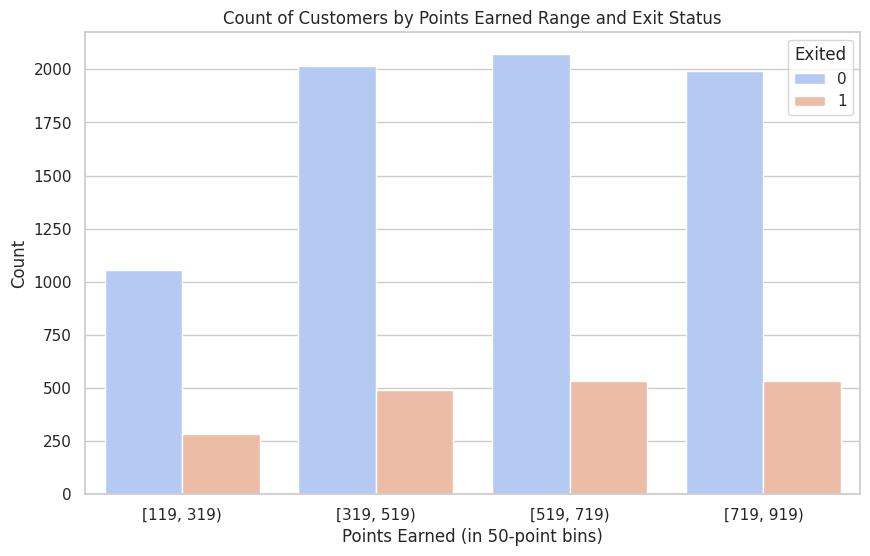

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create bins for "Points Earned" in the range of 0 to 50 with intervals of 50
point_bins = pd.cut(df['Point Earned'], bins=range(np.min(df['Point Earned']), np.max(df['Point Earned']), 200), right=False)

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Create a count plot
sns.countplot(x=point_bins, hue=df['Exited'], palette='coolwarm')

# Set labels and title
plt.xlabel('Points Earned (in 50-point bins)')
plt.ylabel('Count')
plt.title('Count of Customers by Points Earned Range and Exit Status')

# Show the plot
plt.xticks(rotation=0)
plt.show()


In [ ]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


From the Above analysis we can drop:
1.RowNumber
2.CustomerID
3.Surname
4.Complain
5.Card Type
6.Satisfaction Score
7.Gender

In [ ]:
dropCol=['RowNumber','CustomerId','Surname','Complain','Card Type','Satisfaction Score','Gender']

In [ ]:
df.drop(dropCol,axis=1,inplace=True)

In [ ]:
df.head(10)

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Point Earned
0,619,France,42,2,0.00,1,1,1,101348.88,1,464
1,608,Spain,41,1,83807.86,1,0,1,112542.58,0,456
2,502,France,42,8,159660.80,3,1,0,113931.57,1,377
3,699,France,39,1,0.00,2,0,0,93826.63,0,350
4,850,Spain,43,2,125510.82,1,1,1,79084.10,0,425
5,645,Spain,44,8,113755.78,2,1,0,149756.71,1,484
6,822,France,50,7,0.00,2,1,1,10062.80,0,206
7,376,Germany,29,4,115046.74,4,1,0,119346.88,1,282
8,501,France,44,4,142051.07,2,0,1,74940.50,0,251
9,684,France,27,2,134603.88,1,1,1,71725.73,0,342


Balance Analysis

In [ ]:
# Count of customers who have exited (Exited=1) with balance equal to 0
exited_with_zero_balance = len(df[(df['Balance'] == 0) & (df['Exited'] == 1)])

# Count of customers who haven't exited (Exited=0) with balance equal to 0
not_exited_with_zero_balance = len(df[(df['Balance'] == 0) & (df['Exited'] == 0)])

print("Exited with zero balance:", exited_with_zero_balance)
print("Not Exited with zero balance:", not_exited_with_zero_balance)


Exited with zero balance: 500
Not Exited with zero balance: 3117


In [ ]:
len(df[df['Balance']==0])

3617

In [ ]:
len(df[df['NumOfProducts']==3])

266

In [ ]:
len(df[df['Exited'] == 1]),len(df[df['Exited'] == 0])  # Count of customers who haven't exited


(2038, 7962)

In [ ]:
df.dtypes

CreditScore          int64
Geography           object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
Point Earned         int64
dtype: object

In [ ]:
import pandas as pd

# Create dummy variables for the "Geography" column
df=pd.get_dummies(df, columns=['Geography'], prefix='', prefix_sep='',)



In [ ]:
df.dtypes

CreditScore          int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
Point Earned         int64
France               uint8
Germany              uint8
Spain                uint8
dtype: object

In [ ]:
y=df['Exited']
X=df.drop(['Exited'],axis=1)

In [ ]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Point Earned,France,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,464,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,456,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,377,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,350,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,425,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,300,1,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,771,1,0,0
9997,709,36,7,0.00,1,0,1,42085.58,564,1,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,339,0,1,0


In [ ]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the KNN classifier on the training data
knn_classifier.fit(X_train, y_train)

# Use the trained KNN classifier to make predictions on the test data
predictions = knn_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Print classification report for detailed evaluation
print("Classification Report:\n", classification_report(y_test, predictions))

Accuracy: 73.20%
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84      1595
           1       0.22      0.13      0.17       405

    accuracy                           0.73      2000
   macro avg       0.51      0.51      0.50      2000
weighted avg       0.68      0.73      0.70      2000



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Make predictions
predictions = logreg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Logistic Regression Accuracy: {:.2f}%".format(accuracy * 100))

# Print classification report for detailed evaluation
print("Classification Report:\n", classification_report(y_test, predictions))

Logistic Regression Accuracy: 79.95%
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.98      0.89      1607
           1       0.44      0.08      0.13       393

    accuracy                           0.80      2000
   macro avg       0.63      0.53      0.51      2000
weighted avg       0.74      0.80      0.74      2000



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
predictions = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Random Forest Accuracy: {:.2f}%".format(accuracy * 100))

# Print classification report for detailed evaluation
print("Classification Report:\n", classification_report(y_test, predictions))

Random Forest Accuracy: 86.65%
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.48      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
predictions = gb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Gradient Boosting Accuracy: {:.2f}%".format(accuracy * 100))

# Print classification report for detailed evaluation
print("Classification Report:\n", classification_report(y_test, predictions))

Gradient Boosting Accuracy: 86.45%
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.58       393

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train an SVM model
svm_model = svm.SVC(C=1.0, kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
predictions = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("SVM Accuracy: {:.2f}%".format(accuracy * 100))

# Print classification report for detailed evaluation
print("Classification Report:\n", classification_report(y_test, predictions))


SVM Accuracy: 80.35%
Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.metrics import accuracy_score, classification_report

# # Split your data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define a range of hyperparameters to search
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Create a Random Forest model
# rf_model = RandomForestClassifier(random_state=42)

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# # Get the best model from the grid search
# best_rf_model = grid_search.best_estimator_

# # Make predictions
# predictions = best_rf_model.predict(X_test)

# # Evaluate the best model
# accuracy = accuracy_score(y_test, predictions)
# print("Random Forest Accuracy: {:.2f}%".format(accuracy * 100))

# # Print classification report for detailed evaluation
# print("Classification Report:\n", classification_report(y_test, predictions))

# # Print the best hyperparameters found by grid search
# print("Best Hyperparameters:", grid_search.best_params_)


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create and train a Random Forest model
rf_model_best = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=10,
    min_samples_leaf=2,
    random_state=42
)

rf_model_best.fit(X_train, y_train)

# Make predictions
predictions = rf_model_best.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Random Forest Accuracy: {:.2f}%".format(accuracy * 100))

# Print classification report for detailed evaluation
print("Classification Report:\n", classification_report(y_test, predictions))

Random Forest Accuracy: 86.70%
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [ ]:
# 619	42	2	0.00	1	1	1	101348.88	464	1	0	0

In [1]:
# model_filename = 'random_forest_model.pkl'
# joblib.dump(rf_model_best, model_filename)
a = [['619', '42', '2', '0.00', '1', '1', '1', '101348.88', '464', '1', '0', '0']]
rf_model.predict(a)


NameError: ignored